# Pytorch

http://bit.ly/PyTorchZeroAll


w= 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.6666666667
w= 0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.3 32.49
MSE= 16.8466666667
w= 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6 29.16
MSE= 15.12
w= 0.3
	 1.0 2.0 0.3 2.89
	 2.0 4.0 0.6 11.56
	 3.0 6.0 0.9 26.01
MSE= 13.4866666667
w= 0.4
	 1.0 2.0 0.4 2.56
	 2.0 4.0 0.8 10.24
	 3.0 6.0 1.2 23.04
MSE= 11.9466666667
w= 0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE= 10.5
w= 0.6
	 1.0 2.0 0.6 1.96
	 2.0 4.0 1.2 7.84
	 3.0 6.0 1.8 17.64
MSE= 9.14666666667
w= 0.7
	 1.0 2.0 0.7 1.69
	 2.0 4.0 1.4 6.76
	 3.0 6.0 2.1 15.21
MSE= 7.88666666667
w= 0.8
	 1.0 2.0 0.8 1.44
	 2.0 4.0 1.6 5.76
	 3.0 6.0 2.4 12.96
MSE= 6.72
w= 0.9
	 1.0 2.0 0.9 1.21
	 2.0 4.0 1.8 4.84
	 3.0 6.0 2.7 10.89
MSE= 5.64666666667
w= 1.0
	 1.0 2.0 1.0 1.0
	 2.0 4.0 2.0 4.0
	 3.0 6.0 3.0 9.0
MSE= 4.66666666667
w= 1.1
	 1.0 2.0 1.1 0.81
	 2.0 4.0 2.2 3.24
	 3.0 6.0 3.3 7.29
MSE= 3.78
w= 1.2
	 1.0 2.0 1.2 0.64
	 2.0

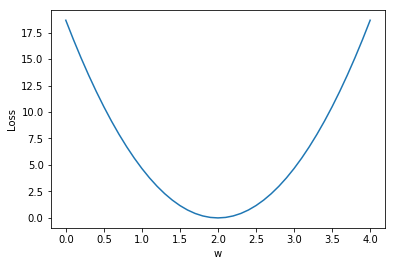

In [1]:
# 1. basics

import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]


# our model for the forward pass
def forward(x):
    return x * w


# Loss function
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)


w_list = []
mse_list = []

for w in np.arange(0.0, 4.1, 0.1):
    print("w=", w)
    l_sum = 0
    for x_val, y_val in zip(x_data, y_data):
        y_pred_val = forward(x_val)
        l = loss(x_val, y_val)
        l_sum += l
        print("\t", x_val, y_val, y_pred_val, l)
    print("MSE=", l_sum / 3)
    w_list.append(w)
    mse_list.append(l_sum / 3)

plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

In [2]:
# 2. manual gradient

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = 1.0  # a random guess: random value

# our model forward pass


def forward(x):
    return x * w


# Loss function
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)


# compute gradient
def gradient(x, y):  # d_loss/d_w
    return 2 * x * (x * w - y)

# Before training
print("predict (before training)",  4, forward(4))

# Training loop
for epoch in range(10):
    for x_val, y_val in zip(x_data, y_data):
        grad = gradient(x_val, y_val)
        w = w - 0.01 * grad
        print("\tgrad: ", x_val, y_val, round(grad, 2))
        l = loss(x_val, y_val)

    print("progress:", epoch, "w=", round(w, 2), "loss=", round(l, 2))

# After training
print("predict (after training)", "4 hours", forward(4))

predict (before training) 4 4.0
	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -7.84
	grad:  3.0 6.0 -16.23
progress: 0 w= 1.26 loss= 4.92
	grad:  1.0 2.0 -1.48
	grad:  2.0 4.0 -5.8
	grad:  3.0 6.0 -12.0
progress: 1 w= 1.45 loss= 2.69
	grad:  1.0 2.0 -1.09
	grad:  2.0 4.0 -4.29
	grad:  3.0 6.0 -8.87
progress: 2 w= 1.6 loss= 1.47
	grad:  1.0 2.0 -0.81
	grad:  2.0 4.0 -3.17
	grad:  3.0 6.0 -6.56
progress: 3 w= 1.7 loss= 0.8
	grad:  1.0 2.0 -0.6
	grad:  2.0 4.0 -2.34
	grad:  3.0 6.0 -4.85
progress: 4 w= 1.78 loss= 0.44
	grad:  1.0 2.0 -0.44
	grad:  2.0 4.0 -1.73
	grad:  3.0 6.0 -3.58
progress: 5 w= 1.84 loss= 0.24
	grad:  1.0 2.0 -0.33
	grad:  2.0 4.0 -1.28
	grad:  3.0 6.0 -2.65
progress: 6 w= 1.88 loss= 0.13
	grad:  1.0 2.0 -0.24
	grad:  2.0 4.0 -0.95
	grad:  3.0 6.0 -1.96
progress: 7 w= 1.91 loss= 0.07
	grad:  1.0 2.0 -0.18
	grad:  2.0 4.0 -0.7
	grad:  3.0 6.0 -1.45
progress: 8 w= 1.93 loss= 0.04
	grad:  1.0 2.0 -0.13
	grad:  2.0 4.0 -0.52
	grad:  3.0 6.0 -1.07
progress: 9 w= 1.95 loss= 0.02
pred

In [3]:
# 3.auto-gradient

import torch
from torch.autograd import Variable

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = Variable(torch.Tensor([1.0]),  requires_grad=True)  # Any random value

# our model forward pass


def forward(x):
    return x * w

# Loss function


def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)

# Before training
print("predict (before training)",  4, forward(4).data[0])

# Training loop
for epoch in range(10):
    for x_val, y_val in zip(x_data, y_data):
        l = loss(x_val, y_val)
        l.backward()
        print("\tgrad: ", x_val, y_val, w.grad.data[0])
        w.data = w.data - 0.01 * w.grad.data

        # Manually zero the gradients after updating weights
        w.grad.data.zero_()

    print("progress:", epoch, l.data[0])

# After training
print("predict (after training)", 4, forward(4).data[0])

predict (before training) 4 4.0
	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -7.840000152587891
	grad:  3.0 6.0 -16.228801727294922
progress: 0 7.315943717956543
	grad:  1.0 2.0 -1.478623867034912
	grad:  2.0 4.0 -5.796205520629883
	grad:  3.0 6.0 -11.998146057128906
progress: 1 3.9987640380859375
	grad:  1.0 2.0 -1.0931644439697266
	grad:  2.0 4.0 -4.285204887390137
	grad:  3.0 6.0 -8.870372772216797
progress: 2 2.1856532096862793
	grad:  1.0 2.0 -0.8081896305084229
	grad:  2.0 4.0 -3.1681032180786133
	grad:  3.0 6.0 -6.557973861694336
progress: 3 1.1946394443511963
	grad:  1.0 2.0 -0.5975041389465332
	grad:  2.0 4.0 -2.3422164916992188
	grad:  3.0 6.0 -4.848389625549316
progress: 4 0.6529689431190491
	grad:  1.0 2.0 -0.4417421817779541
	grad:  2.0 4.0 -1.7316293716430664
	grad:  3.0 6.0 -3.58447265625
progress: 5 0.35690122842788696
	grad:  1.0 2.0 -0.3265852928161621
	grad:  2.0 4.0 -1.2802143096923828
	grad:  3.0 6.0 -2.650045394897461
progress: 6 0.195076122879982
	grad:  1.0 2.0 -0.24144

In [4]:
# 5. linear regression

import torch
from torch.autograd import Variable

x_data = Variable(torch.Tensor([[1.0], [2.0], [3.0]]))
y_data = Variable(torch.Tensor([[2.0], [4.0], [6.0]]))


class Model(torch.nn.Module):

    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and one out

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        y_pred = self.linear(x)
        return y_pred

# our model
model = Model()


# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(500):
        # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)

    # Compute and print loss
    loss = criterion(y_pred, y_data)
    print(epoch, loss.data[0])

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


# After training
hour_var = Variable(torch.Tensor([[4.0]]))
y_pred = model(hour_var)
print("predict (after training)", 4, model(hour_var).data[0][0])


0 49.68061065673828
1 22.38979721069336
2 10.236771583557129
3 4.82271671295166
4 2.408717632293701
5 1.3303112983703613
6 0.8465259671211243
7 0.6275047659873962
8 0.5263998508453369
9 0.47784096002578735
10 0.4527240991592407
11 0.4380934238433838
12 0.42818063497543335
13 0.42041727900505066
14 0.4136583209037781
15 0.407394140958786
16 0.40139758586883545
17 0.3955652117729187
18 0.3898524343967438
19 0.38423705101013184
20 0.3787093162536621
21 0.3732643127441406
22 0.36789894104003906
23 0.3626110851764679
24 0.3573996424674988
25 0.35226285457611084
26 0.34720057249069214
27 0.34221068024635315
28 0.33729246258735657
29 0.3324451446533203
30 0.3276674151420593
31 0.3229581415653229
32 0.31831681728363037
33 0.3137420117855072
34 0.30923300981521606
35 0.3047887086868286
36 0.3004087209701538
37 0.29609137773513794
38 0.29183587431907654
39 0.28764158487319946
40 0.28350791335105896
41 0.27943357825279236
42 0.27541762590408325
43 0.27145928144454956
44 0.2675580084323883
45 0.26

In [5]:
# 6. logistic regression

import torch
from torch.autograd import Variable
import torch.nn.functional as F

x_data = Variable(torch.Tensor([[1.0], [2.0], [3.0], [4.0]]))
y_data = Variable(torch.Tensor([[0.], [0.], [1.], [1.]]))


class Model(torch.nn.Module):

    def __init__(self):
        """
        In the constructor we instantiate nn.Linear module
        """
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and one out

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data.
        """
        y_pred = F.sigmoid(self.linear(x))
        return y_pred

# our model
model = Model()


# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(1000):
        # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)

    # Compute and print loss
    loss = criterion(y_pred, y_data)
    print(epoch, loss.data[0])

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# After training
hour_var = Variable(torch.Tensor([[1.0]]))
print("predict 1 hour ", 1.0, model(hour_var).data[0][0] > 0.5)
hour_var = Variable(torch.Tensor([[7.0]]))
print("predict 7 hours", 7.0, model(hour_var).data[0][0] > 0.5)

0 0.5842203497886658
1 0.5822995901107788
2 0.5804102420806885
3 0.5785517692565918
4 0.5767239928245544
5 0.574926495552063
6 0.5731590986251831
7 0.5714214444160461
8 0.5697131156921387
9 0.5680338740348816
10 0.5663833618164062
11 0.5647613406181335
12 0.5631673336029053
13 0.5616010427474976
14 0.5600622296333313
15 0.5585504174232483
16 0.5570654273033142
17 0.5556067824363708
18 0.5541740655899048
19 0.5527670979499817
20 0.5513855218887329
21 0.5500289797782898
22 0.5486970543861389
23 0.5473893284797668
24 0.5461056232452393
25 0.544845461845398
26 0.5436086058616638
27 0.5423946380615234
28 0.5412032008171082
29 0.5400339961051941
30 0.5388866066932678
31 0.5377606749534607
32 0.5366560220718384
33 0.5355721116065979
34 0.5345088243484497
35 0.5334655046463013
36 0.532442033290863
37 0.531437873840332
38 0.5304530262947083
39 0.5294869542121887
40 0.5285392999649048
41 0.5276097059249878
42 0.5266979336738586
43 0.5258036851882935
44 0.5249266624450684
45 0.5240663290023804
46

855 0.39353635907173157
856 0.3934364914894104
857 0.3933367133140564
858 0.3932369649410248
859 0.39313724637031555
860 0.3930376172065735
861 0.3929380774497986
862 0.3928385376930237
863 0.3927391469478607
864 0.392639696598053
865 0.3925403356552124
866 0.3924410343170166
867 0.39234185218811035
868 0.3922426402568817
869 0.392143577337265
870 0.3920445144176483
871 0.3919455111026764
872 0.39184659719467163
873 0.39174777269363403
874 0.39164888858795166
875 0.39155006408691406
876 0.3914514183998108
877 0.39135274291038513
878 0.391254186630249
879 0.3911556005477905
880 0.3910571336746216
881 0.3909587264060974
882 0.390860378742218
883 0.390762060880661
884 0.3906637728214264
885 0.3905656039714813
886 0.39046749472618103
887 0.39036935567855835
888 0.3902713358402252
889 0.39017337560653687
890 0.3900754451751709
891 0.3899776041507721
892 0.38987982273101807
893 0.3897820711135864
894 0.38968437910079956
895 0.3895867168903351
896 0.38948917388916016
897 0.3893916606903076
89

In [6]:
# 7. diabets logistic

import torch
from torch.autograd import Variable
import numpy as np

xy = np.loadtxt('./data/diabetes.csv.gz', delimiter=',', dtype=np.float32)
x_data = Variable(torch.from_numpy(xy[:, 0:-1]))
y_data = Variable(torch.from_numpy(xy[:, [-1]]))

print(x_data.data.shape)
print(y_data.data.shape)


class Model(torch.nn.Module):

    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(Model, self).__init__()
        self.l1 = torch.nn.Linear(8, 6)
        self.l2 = torch.nn.Linear(6, 4)
        self.l3 = torch.nn.Linear(4, 1)

        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        out1 = self.sigmoid(self.l1(x))
        out2 = self.sigmoid(self.l2(out1))
        y_pred = self.sigmoid(self.l3(out2))
        return y_pred

# our model
model = Model()


# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training loop
for epoch in range(100):
        # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)

    # Compute and print loss
    loss = criterion(y_pred, y_data)
    print(epoch, loss.data[0])

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
optimizer.step()

torch.Size([759, 8])
torch.Size([759, 1])
0 0.6759634017944336
1 0.6759634017944336
2 0.6759634017944336
3 0.6759634017944336
4 0.6759634017944336
5 0.6759634017944336
6 0.6759634017944336
7 0.6759634017944336
8 0.6759634017944336
9 0.6759634017944336
10 0.6759634017944336
11 0.6759634017944336
12 0.6759634017944336
13 0.6759634017944336
14 0.6759634017944336
15 0.6759634017944336
16 0.6759634017944336
17 0.6759634017944336
18 0.6759634017944336
19 0.6759634017944336
20 0.6759634017944336
21 0.6759634017944336
22 0.6759634017944336
23 0.6759634017944336
24 0.6759634017944336
25 0.6759634017944336
26 0.6759634017944336
27 0.6759634017944336
28 0.6759634017944336
29 0.6759634017944336
30 0.6759634017944336
31 0.6759634017944336
32 0.6759634017944336
33 0.6759634017944336
34 0.6759634017944336
35 0.6759634017944336
36 0.6759634017944336
37 0.6759634017944336
38 0.6759634017944336
39 0.6759634017944336
40 0.6759634017944336
41 0.6759634017944336
42 0.6759634017944336
43 0.6759634017944336


In [7]:
# 8-1. dataset loader


# References
# https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/pytorch_basics/main.py
# http://pytorch.org/tutorials/beginner/data_loading_tutorial.html#dataset-class
import torch
import numpy as np
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader


class DiabetesDataset(Dataset):
    """ Diabetes dataset."""

    # Initialize your data, download, etc.
    def __init__(self):
        xy = np.loadtxt('./data/diabetes.csv.gz',
                        delimiter=',', dtype=np.float32)
        self.len = xy.shape[0]
        self.x_data = torch.from_numpy(xy[:, 0:-1])
        self.y_data = torch.from_numpy(xy[:, [-1]])

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len


dataset = DiabetesDataset()
train_loader = DataLoader(dataset=dataset,
                          batch_size=32,
                          shuffle=True,
                          num_workers=2)

for epoch in range(2):
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # Run your training process
print(epoch, i, "inputs", inputs.data, "labels", labels.data)

1 23 inputs 
-0.6471 -0.2161 -0.1803 -0.3535 -0.7920 -0.0760 -0.8548 -0.8333
 0.5294  0.5377  0.4426 -0.2525 -0.6690  0.2101 -0.0640 -0.4000
-0.5294 -0.1658  0.4098 -0.6162  0.0000 -0.1267 -0.7959 -0.5667
 0.0588  0.0653 -0.1475  0.0000  0.0000 -0.0700 -0.7421 -0.3000
-0.7647 -0.0854  0.0164  0.0000  0.0000 -0.1863 -0.6183 -0.9667
 0.0588  0.2261 -0.0820  0.0000  0.0000 -0.0075 -0.1153 -0.6000
 0.1765  0.1156  0.1475 -0.4545  0.0000 -0.1803 -0.9462 -0.3667
-0.6471  0.8794  0.1475 -0.5556 -0.5272  0.0849 -0.7182 -0.5000
-0.7647  0.1960  0.0000  0.0000  0.0000 -0.4158 -0.3561  0.7000
-0.4118  0.0653  0.3443 -0.3939  0.0000  0.1773 -0.8224 -0.4333
-0.7647 -0.2563  0.0000  0.0000  0.0000  0.0000 -0.9795 -0.9667
-0.1765  0.0653 -0.0164 -0.5152  0.0000 -0.2101 -0.8138 -0.7333
-0.8824  0.1658  0.1475 -0.4343  0.0000 -0.1833 -0.8924  0.0000
 0.4118  0.5176  0.1475 -0.1919 -0.3593  0.2459 -0.4330 -0.4333
 0.1765  0.0151  0.4098 -0.2525  0.0000  0.3592 -0.0965 -0.4333
-0.7647  0.2965  0.0000  0.

In [8]:
# 8-2. dataset load logistic

# References
# https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/pytorch_basics/main.py
# http://pytorch.org/tutorials/beginner/data_loading_tutorial.html#dataset-class
import torch
import numpy as np
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader


class DiabetesDataset(Dataset):
    """ Diabetes dataset."""

    # Initialize your data, download, etc.
    def __init__(self):
        xy = np.loadtxt('./data/diabetes.csv.gz',
                        delimiter=',', dtype=np.float32)
        self.len = xy.shape[0]
        self.x_data = torch.from_numpy(xy[:, 0:-1])
        self.y_data = torch.from_numpy(xy[:, [-1]])

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len


dataset = DiabetesDataset()
train_loader = DataLoader(dataset=dataset,
                          batch_size=32,
                          shuffle=True,
                          num_workers=2)


class Model(torch.nn.Module):

    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(Model, self).__init__()
        self.l1 = torch.nn.Linear(8, 6)
        self.l2 = torch.nn.Linear(6, 4)
        self.l3 = torch.nn.Linear(4, 1)

        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        out1 = self.sigmoid(self.l1(x))
        out2 = self.sigmoid(self.l2(out1))
        y_pred = self.sigmoid(self.l3(out2))
        return y_pred

# our model
model = Model()


# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training loop
for epoch in range(2):
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # Forward pass: Compute predicted y by passing x to the model
        y_pred = model(inputs)

        # Compute and print loss
        loss = criterion(y_pred, labels)
        print(epoch, i, loss.data[0])

        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()
        loss.backward()
optimizer.step()

0 0 0.7185835242271423
0 1 0.743821382522583
0 2 0.7104381918907166
0 3 0.693465530872345
0 4 0.7602843046188354
0 5 0.7435920834541321
0 6 0.7185668349266052
0 7 0.7602136731147766
0 8 0.7604142427444458
0 9 0.7435073256492615
0 10 0.7852462530136108
0 11 0.743628203868866
0 12 0.7186658978462219
0 13 0.7685456871986389
0 14 0.7268033623695374
0 15 0.7020373344421387
0 16 0.7693687677383423
0 17 0.7690266966819763
0 18 0.7692772150039673
0 19 0.7351671457290649
0 20 0.7352761626243591
0 21 0.7689331769943237
0 22 0.7439591884613037
0 23 0.7429404854774475
1 0 0.7354966402053833
1 1 0.7438467741012573
1 2 0.7019084095954895
1 3 0.7687605023384094
1 4 0.7520692944526672
1 5 0.7019105553627014
1 6 0.7352033853530884
1 7 0.7435030341148376
1 8 0.7774457931518555
1 9 0.7438135147094727
1 10 0.7352443933486938
1 11 0.7436439990997314
1 12 0.7772394418716431
1 13 0.7525378465652466
1 14 0.7434481382369995
1 15 0.7520435452461243
1 16 0.6851035356521606
1 17 0.7602207660675049
1 18 0.73564565

In [9]:
# 9-1 softmax loss
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable


# Cross entropy example
import numpy as np
# One hot
# 0: 1 0 0
# 1: 0 1 0
# 2: 0 0 1
Y = np.array([1, 0, 0])

Y_pred1 = np.array([0.7, 0.2, 0.1])
Y_pred2 = np.array([0.1, 0.3, 0.6])
print("loss1 = ", np.sum(-Y * np.log(Y_pred1)))
print("loss2 = ", np.sum(-Y * np.log(Y_pred2)))

# Softmax + CrossEntropy (logSoftmax + NLLLoss)
loss = nn.CrossEntropyLoss()

# target is of size nBatch
# each element in target has to have 0 <= value < nClasses (0-2)
# Input is class, not one-hot
Y = Variable(torch.LongTensor([0]), requires_grad=False)

# input is of size nBatch x nClasses = 1 x 4
# Y_pred are logits (not softmax)
Y_pred1 = Variable(torch.Tensor([[2.0, 1.0, 0.1]]))
Y_pred2 = Variable(torch.Tensor([[0.5, 2.0, 0.3]]))

l1 = loss(Y_pred1, Y)
l2 = loss(Y_pred2, Y)

print("PyTorch Loss1 = ", l1.data, "\nPyTorch Loss2=", l2.data)

print("Y_pred1=", torch.max(Y_pred1.data, 1)[1])
print("Y_pred2=", torch.max(Y_pred2.data, 1)[1])

# target is of size nBatch
# each element in target has to have 0 <= value < nClasses (0-2)
# Input is class, not one-hot
Y = Variable(torch.LongTensor([2, 0, 1]), requires_grad=False)

# input is of size nBatch x nClasses = 2 x 4
# Y_pred are logits (not softmax)
Y_pred1 = Variable(torch.Tensor([[0.1, 0.2, 0.9],
                                 [1.1, 0.1, 0.2],
                                 [0.2, 2.1, 0.1]]))


Y_pred2 = Variable(torch.Tensor([[0.8, 0.2, 0.3],
                                 [0.2, 0.3, 0.5],
                                 [0.2, 0.2, 0.5]]))

l1 = loss(Y_pred1, Y)
l2 = loss(Y_pred2, Y)

print("Batch Loss1 = ", l1.data, "\nBatch Loss2=", l2.data)

loss1 =  0.356674943939
loss2 =  2.30258509299
PyTorch Loss1 =  
 0.4170
[torch.FloatTensor of size 1]
 
PyTorch Loss2= 
 1.8406
[torch.FloatTensor of size 1]

Y_pred1= 
 0
[torch.LongTensor of size 1]

Y_pred2= 
 1
[torch.LongTensor of size 1]

Batch Loss1 =  
 0.4966
[torch.FloatTensor of size 1]
 
Batch Loss2= 
 1.2389
[torch.FloatTensor of size 1]



In [10]:
# 9-2 softmax mnist
# https://github.com/pytorch/examples/blob/master/mnist/main.py
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# Training settings
batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./mnist_data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./mnist_data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.l1 = nn.Linear(784, 520)
        self.l2 = nn.Linear(520, 320)
        self.l3 = nn.Linear(320, 240)
        self.l4 = nn.Linear(240, 120)
        self.l5 = nn.Linear(120, 10)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten the data (n, 1, 28, 28)-> (n, 784)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        return self.l5(x)


model = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)


def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))


def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        # sum up batch loss
        test_loss += criterion(output, target).data[0]
        # get the index of the max
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


for epoch in range(1, 10):
    train(epoch)
test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.298479
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.297069
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.302607
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.298725
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.302594
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.300864
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.289707
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.305090
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.291956
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.306223
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.301998
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.298461
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.307546
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.301401
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.296962
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.302528
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.305516
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.304045
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.284206
Train Epoch: 1 [12160/60000 (20%)]	Loss: 2.296022
Train Epoch: 1 [12800/60000 (

Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.629471
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.711863
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.426627
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.461771
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.569290
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.760307
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.673574
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.481676
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.439564
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.459715
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.622063
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.304983
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.939513
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.511723
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.268162
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.593233
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.396420
Train Epoch: 2 [58240/60000 (97%)]	Loss: 0.303456
Train Epoch: 2 [58880/60000 (98%)]	Loss: 0.334687
Train Epoch: 2 [59520/60000 (99%)]	Loss: 0.628324


Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.252922
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.228058
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.438608
Train Epoch: 4 [36480/60000 (61%)]	Loss: 0.265203
Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.301236
Train Epoch: 4 [37760/60000 (63%)]	Loss: 0.502402
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.116455
Train Epoch: 4 [39040/60000 (65%)]	Loss: 0.383611
Train Epoch: 4 [39680/60000 (66%)]	Loss: 0.447286
Train Epoch: 4 [40320/60000 (67%)]	Loss: 0.388001
Train Epoch: 4 [40960/60000 (68%)]	Loss: 0.217791
Train Epoch: 4 [41600/60000 (69%)]	Loss: 0.219702
Train Epoch: 4 [42240/60000 (70%)]	Loss: 0.363162
Train Epoch: 4 [42880/60000 (71%)]	Loss: 0.170444
Train Epoch: 4 [43520/60000 (72%)]	Loss: 0.178112
Train Epoch: 4 [44160/60000 (74%)]	Loss: 0.054461
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.324728
Train Epoch: 4 [45440/60000 (76%)]	Loss: 0.152842
Train Epoch: 4 [46080/60000 (77%)]	Loss: 0.208122
Train Epoch: 4 [46720/60000 (78%)]	Loss: 0.244024


Train Epoch: 6 [20480/60000 (34%)]	Loss: 0.173381
Train Epoch: 6 [21120/60000 (35%)]	Loss: 0.185687
Train Epoch: 6 [21760/60000 (36%)]	Loss: 0.110115
Train Epoch: 6 [22400/60000 (37%)]	Loss: 0.047674
Train Epoch: 6 [23040/60000 (38%)]	Loss: 0.294275
Train Epoch: 6 [23680/60000 (39%)]	Loss: 0.303104
Train Epoch: 6 [24320/60000 (41%)]	Loss: 0.068157
Train Epoch: 6 [24960/60000 (42%)]	Loss: 0.402424
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.127292
Train Epoch: 6 [26240/60000 (44%)]	Loss: 0.112820
Train Epoch: 6 [26880/60000 (45%)]	Loss: 0.193279
Train Epoch: 6 [27520/60000 (46%)]	Loss: 0.092721
Train Epoch: 6 [28160/60000 (47%)]	Loss: 0.071464
Train Epoch: 6 [28800/60000 (48%)]	Loss: 0.089813
Train Epoch: 6 [29440/60000 (49%)]	Loss: 0.086753
Train Epoch: 6 [30080/60000 (50%)]	Loss: 0.191834
Train Epoch: 6 [30720/60000 (51%)]	Loss: 0.143986
Train Epoch: 6 [31360/60000 (52%)]	Loss: 0.194206
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.095993
Train Epoch: 6 [32640/60000 (54%)]	Loss: 0.080402


Train Epoch: 8 [5760/60000 (10%)]	Loss: 0.066363
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.092153
Train Epoch: 8 [7040/60000 (12%)]	Loss: 0.113126
Train Epoch: 8 [7680/60000 (13%)]	Loss: 0.079544
Train Epoch: 8 [8320/60000 (14%)]	Loss: 0.154340
Train Epoch: 8 [8960/60000 (15%)]	Loss: 0.079017
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.186419
Train Epoch: 8 [10240/60000 (17%)]	Loss: 0.042345
Train Epoch: 8 [10880/60000 (18%)]	Loss: 0.161607
Train Epoch: 8 [11520/60000 (19%)]	Loss: 0.069224
Train Epoch: 8 [12160/60000 (20%)]	Loss: 0.029599
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.049986
Train Epoch: 8 [13440/60000 (22%)]	Loss: 0.102450
Train Epoch: 8 [14080/60000 (23%)]	Loss: 0.077999
Train Epoch: 8 [14720/60000 (25%)]	Loss: 0.133109
Train Epoch: 8 [15360/60000 (26%)]	Loss: 0.166762
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.165334
Train Epoch: 8 [16640/60000 (28%)]	Loss: 0.126635
Train Epoch: 8 [17280/60000 (29%)]	Loss: 0.125889
Train Epoch: 8 [17920/60000 (30%)]	Loss: 0.167826
Train E

Train Epoch: 9 [51840/60000 (86%)]	Loss: 0.090051
Train Epoch: 9 [52480/60000 (87%)]	Loss: 0.034477
Train Epoch: 9 [53120/60000 (88%)]	Loss: 0.038356
Train Epoch: 9 [53760/60000 (90%)]	Loss: 0.025269
Train Epoch: 9 [54400/60000 (91%)]	Loss: 0.145742
Train Epoch: 9 [55040/60000 (92%)]	Loss: 0.138391
Train Epoch: 9 [55680/60000 (93%)]	Loss: 0.126656
Train Epoch: 9 [56320/60000 (94%)]	Loss: 0.024742
Train Epoch: 9 [56960/60000 (95%)]	Loss: 0.123196
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.142367
Train Epoch: 9 [58240/60000 (97%)]	Loss: 0.043123
Train Epoch: 9 [58880/60000 (98%)]	Loss: 0.033794
Train Epoch: 9 [59520/60000 (99%)]	Loss: 0.126679


KeyboardInterrupt: 

In [14]:
# 10-1 cnn_mnist
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# Training settings
batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.mp = nn.MaxPool2d(2)
        self.fc = nn.Linear(320, 10)

    def forward(self, x):
        in_size = x.size(0)
        x = F.relu(self.mp(self.conv1(x)))
        x = F.relu(self.mp(self.conv2(x)))
        x = x.view(in_size, -1)  # flatten the tensor
        x = self.fc(x)
        return F.log_softmax(x)


model = Net()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)


def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))


def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        # sum up batch loss
        test_loss += F.nll_loss(output, target, size_average=False).data[0]
        # get the index of the max log-probability
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


for epoch in range(1, 10):
    train(epoch)
test()

Processing...
Done!
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.312753


/home/jw/venv/py3/lib/python3.5/site-packages/ipykernel_launcher.py:49: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [640/60000 (1%)]	Loss: 2.319500
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.292898
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.289500
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.285129
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.266376
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.243713
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.234079
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.207976
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.153191
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.154187
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.068593
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.973876
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.819871
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.472609
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.427214
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.271433
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.040491
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.963183
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.578554
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.716940
Train Epoch: 1 [13440/60

Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.099933
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.075369
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.169033
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.182880
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.109051
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.044440
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.167501
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.114766
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.134146
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.074208
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.182562
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.063717
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.159961
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.078906
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.096927
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.153420
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.194011
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.093960
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.068611
Train Epoch: 2 [58240/60000 (97%)]	Loss: 0.066739


Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.301186
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.023737
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.108017
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.148332
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.018325
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.041269
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.033969
Train Epoch: 4 [36480/60000 (61%)]	Loss: 0.175850
Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.068201
Train Epoch: 4 [37760/60000 (63%)]	Loss: 0.015735
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.066413
Train Epoch: 4 [39040/60000 (65%)]	Loss: 0.086220
Train Epoch: 4 [39680/60000 (66%)]	Loss: 0.036130
Train Epoch: 4 [40320/60000 (67%)]	Loss: 0.039361
Train Epoch: 4 [40960/60000 (68%)]	Loss: 0.045031
Train Epoch: 4 [41600/60000 (69%)]	Loss: 0.146137
Train Epoch: 4 [42240/60000 (70%)]	Loss: 0.054742
Train Epoch: 4 [42880/60000 (71%)]	Loss: 0.335858
Train Epoch: 4 [43520/60000 (72%)]	Loss: 0.049244
Train Epoch: 4 [44160/60000 (74%)]	Loss: 0.203828


Train Epoch: 6 [17920/60000 (30%)]	Loss: 0.030309
Train Epoch: 6 [18560/60000 (31%)]	Loss: 0.080539
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.092254
Train Epoch: 6 [19840/60000 (33%)]	Loss: 0.092281
Train Epoch: 6 [20480/60000 (34%)]	Loss: 0.046978
Train Epoch: 6 [21120/60000 (35%)]	Loss: 0.055710
Train Epoch: 6 [21760/60000 (36%)]	Loss: 0.034637
Train Epoch: 6 [22400/60000 (37%)]	Loss: 0.024366
Train Epoch: 6 [23040/60000 (38%)]	Loss: 0.012413
Train Epoch: 6 [23680/60000 (39%)]	Loss: 0.063499
Train Epoch: 6 [24320/60000 (41%)]	Loss: 0.066098
Train Epoch: 6 [24960/60000 (42%)]	Loss: 0.026826
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.058143
Train Epoch: 6 [26240/60000 (44%)]	Loss: 0.021718
Train Epoch: 6 [26880/60000 (45%)]	Loss: 0.170595
Train Epoch: 6 [27520/60000 (46%)]	Loss: 0.065993
Train Epoch: 6 [28160/60000 (47%)]	Loss: 0.021270
Train Epoch: 6 [28800/60000 (48%)]	Loss: 0.055679
Train Epoch: 6 [29440/60000 (49%)]	Loss: 0.037750
Train Epoch: 6 [30080/60000 (50%)]	Loss: 0.034487


Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.039185
Train Epoch: 8 [3840/60000 (6%)]	Loss: 0.030273
Train Epoch: 8 [4480/60000 (7%)]	Loss: 0.082167
Train Epoch: 8 [5120/60000 (9%)]	Loss: 0.092133
Train Epoch: 8 [5760/60000 (10%)]	Loss: 0.091059
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.022530
Train Epoch: 8 [7040/60000 (12%)]	Loss: 0.014088
Train Epoch: 8 [7680/60000 (13%)]	Loss: 0.053925
Train Epoch: 8 [8320/60000 (14%)]	Loss: 0.031718
Train Epoch: 8 [8960/60000 (15%)]	Loss: 0.028522
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.011386
Train Epoch: 8 [10240/60000 (17%)]	Loss: 0.021276
Train Epoch: 8 [10880/60000 (18%)]	Loss: 0.098737
Train Epoch: 8 [11520/60000 (19%)]	Loss: 0.028933
Train Epoch: 8 [12160/60000 (20%)]	Loss: 0.143953
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.019793
Train Epoch: 8 [13440/60000 (22%)]	Loss: 0.110389
Train Epoch: 8 [14080/60000 (23%)]	Loss: 0.004315
Train Epoch: 8 [14720/60000 (25%)]	Loss: 0.085256
Train Epoch: 8 [15360/60000 (26%)]	Loss: 0.030260
Train Epoch: 8 

Train Epoch: 9 [48640/60000 (81%)]	Loss: 0.313964
Train Epoch: 9 [49280/60000 (82%)]	Loss: 0.032920
Train Epoch: 9 [49920/60000 (83%)]	Loss: 0.037503
Train Epoch: 9 [50560/60000 (84%)]	Loss: 0.143344
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.045236
Train Epoch: 9 [51840/60000 (86%)]	Loss: 0.022686
Train Epoch: 9 [52480/60000 (87%)]	Loss: 0.030187
Train Epoch: 9 [53120/60000 (88%)]	Loss: 0.040202
Train Epoch: 9 [53760/60000 (90%)]	Loss: 0.224778
Train Epoch: 9 [54400/60000 (91%)]	Loss: 0.052128
Train Epoch: 9 [55040/60000 (92%)]	Loss: 0.063841
Train Epoch: 9 [55680/60000 (93%)]	Loss: 0.058738
Train Epoch: 9 [56320/60000 (94%)]	Loss: 0.014848
Train Epoch: 9 [56960/60000 (95%)]	Loss: 0.037866
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.049599
Train Epoch: 9 [58240/60000 (97%)]	Loss: 0.037353
Train Epoch: 9 [58880/60000 (98%)]	Loss: 0.096749
Train Epoch: 9 [59520/60000 (99%)]	Loss: 0.082595

Test set: Average loss: 0.0587, Accuracy: 9818/10000 (98%)



In [11]:
# 11-1  toy inception mnist
# https://github.com/pytorch/examples/blob/master/mnist/main.py
## 속도가 느려서 테스트 중지, gpu pc 사용할것.

from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# Training settings
batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


class InceptionA(nn.Module):

    def __init__(self, in_channels):
        super(InceptionA, self).__init__()
        self.branch1x1 = nn.Conv2d(in_channels, 16, kernel_size=1)

        self.branch5x5_1 = nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch5x5_2 = nn.Conv2d(16, 24, kernel_size=5, padding=2)

        self.branch3x3dbl_1 = nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch3x3dbl_2 = nn.Conv2d(16, 24, kernel_size=3, padding=1)
        self.branch3x3dbl_3 = nn.Conv2d(24, 24, kernel_size=3, padding=1)

        self.branch_pool = nn.Conv2d(in_channels, 24, kernel_size=1)

    def forward(self, x):
        branch1x1 = self.branch1x1(x)

        branch5x5 = self.branch5x5_1(x)
        branch5x5 = self.branch5x5_2(branch5x5)

        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)

        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)

        outputs = [branch1x1, branch5x5, branch3x3dbl, branch_pool]
        return torch.cat(outputs, 1)


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(88, 20, kernel_size=5)

        self.incept1 = InceptionA(in_channels=10)
        self.incept2 = InceptionA(in_channels=20)

        self.mp = nn.MaxPool2d(2)
        self.fc = nn.Linear(1408, 10)

    def forward(self, x):
        in_size = x.size(0)
        x = F.relu(self.mp(self.conv1(x)))
        x = self.incept1(x)
        x = F.relu(self.mp(self.conv2(x)))
        x = self.incept2(x)
        x = x.view(in_size, -1)  # flatten the tensor
        x = self.fc(x)
        return F.log_softmax(x)


model = Net()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)


def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))


def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        # sum up batch loss
        test_loss += F.nll_loss(output, target, size_average=False).data[0]
        # get the index of the max log-probability
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


for epoch in range(1, 10):
    train(epoch)
test()

/home/jw/venv/python3-numpy/lib/python3.5/site-packages/ipykernel_launcher.py:90: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.307018
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.304096
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.306845
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.294322
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.293642
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.299750
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.297143
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.293474
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.308960
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.293329
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.295993
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.275862
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.278942
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.278620
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.267714
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.274187
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.253995
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.240003
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.196830
Train Epoch: 1 [12160/60000 (20%)]	Loss: 2.188442
Train Epoch: 1 [12800/60000 (

Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.174722
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.087917
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.092652
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.074834
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.199519
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.063857
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.045979
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.083560
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.153686
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.044878
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.048620
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.095115
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.124644
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.055137
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.475606
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.169598
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.048228
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.098648
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.103859
Train Epoch: 2 [58240/60000 (97%)]	Loss: 0.108960


Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.074527
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.235752
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.178542
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.037945
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.097308
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.014558
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.011038
Train Epoch: 4 [36480/60000 (61%)]	Loss: 0.068189
Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.145726
Train Epoch: 4 [37760/60000 (63%)]	Loss: 0.064552
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.122019
Train Epoch: 4 [39040/60000 (65%)]	Loss: 0.025413
Train Epoch: 4 [39680/60000 (66%)]	Loss: 0.057187
Train Epoch: 4 [40320/60000 (67%)]	Loss: 0.028228
Train Epoch: 4 [40960/60000 (68%)]	Loss: 0.038791
Train Epoch: 4 [41600/60000 (69%)]	Loss: 0.187048
Train Epoch: 4 [42240/60000 (70%)]	Loss: 0.091173
Train Epoch: 4 [42880/60000 (71%)]	Loss: 0.018344
Train Epoch: 4 [43520/60000 (72%)]	Loss: 0.043165
Train Epoch: 4 [44160/60000 (74%)]	Loss: 0.070477


Train Epoch: 6 [17920/60000 (30%)]	Loss: 0.011020
Train Epoch: 6 [18560/60000 (31%)]	Loss: 0.126791
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.179019
Train Epoch: 6 [19840/60000 (33%)]	Loss: 0.035597
Train Epoch: 6 [20480/60000 (34%)]	Loss: 0.012565
Train Epoch: 6 [21120/60000 (35%)]	Loss: 0.050702
Train Epoch: 6 [21760/60000 (36%)]	Loss: 0.025370
Train Epoch: 6 [22400/60000 (37%)]	Loss: 0.045355
Train Epoch: 6 [23040/60000 (38%)]	Loss: 0.072800
Train Epoch: 6 [23680/60000 (39%)]	Loss: 0.150834
Train Epoch: 6 [24320/60000 (41%)]	Loss: 0.082033
Train Epoch: 6 [24960/60000 (42%)]	Loss: 0.097189
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.070942
Train Epoch: 6 [26240/60000 (44%)]	Loss: 0.095503
Train Epoch: 6 [26880/60000 (45%)]	Loss: 0.011033
Train Epoch: 6 [27520/60000 (46%)]	Loss: 0.214240
Train Epoch: 6 [28160/60000 (47%)]	Loss: 0.009554
Train Epoch: 6 [28800/60000 (48%)]	Loss: 0.007438
Train Epoch: 6 [29440/60000 (49%)]	Loss: 0.015305
Train Epoch: 6 [30080/60000 (50%)]	Loss: 0.031626


Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.153940
Train Epoch: 8 [3840/60000 (6%)]	Loss: 0.007791
Train Epoch: 8 [4480/60000 (7%)]	Loss: 0.020003
Train Epoch: 8 [5120/60000 (9%)]	Loss: 0.039882
Train Epoch: 8 [5760/60000 (10%)]	Loss: 0.155849
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.023670
Train Epoch: 8 [7040/60000 (12%)]	Loss: 0.058468
Train Epoch: 8 [7680/60000 (13%)]	Loss: 0.036051
Train Epoch: 8 [8320/60000 (14%)]	Loss: 0.046500
Train Epoch: 8 [8960/60000 (15%)]	Loss: 0.005258
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.048907
Train Epoch: 8 [10240/60000 (17%)]	Loss: 0.013880
Train Epoch: 8 [10880/60000 (18%)]	Loss: 0.081901
Train Epoch: 8 [11520/60000 (19%)]	Loss: 0.246136
Train Epoch: 8 [12160/60000 (20%)]	Loss: 0.047625
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.080753
Train Epoch: 8 [13440/60000 (22%)]	Loss: 0.038142
Train Epoch: 8 [14080/60000 (23%)]	Loss: 0.046658
Train Epoch: 8 [14720/60000 (25%)]	Loss: 0.207374
Train Epoch: 8 [15360/60000 (26%)]	Loss: 0.013421
Train Epoch: 8 

Train Epoch: 9 [48640/60000 (81%)]	Loss: 0.048706
Train Epoch: 9 [49280/60000 (82%)]	Loss: 0.019799
Train Epoch: 9 [49920/60000 (83%)]	Loss: 0.141657
Train Epoch: 9 [50560/60000 (84%)]	Loss: 0.018098
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.052734
Train Epoch: 9 [51840/60000 (86%)]	Loss: 0.071334
Train Epoch: 9 [52480/60000 (87%)]	Loss: 0.007973
Train Epoch: 9 [53120/60000 (88%)]	Loss: 0.049153
Train Epoch: 9 [53760/60000 (90%)]	Loss: 0.051178
Train Epoch: 9 [54400/60000 (91%)]	Loss: 0.017710
Train Epoch: 9 [55040/60000 (92%)]	Loss: 0.051585
Train Epoch: 9 [55680/60000 (93%)]	Loss: 0.003457
Train Epoch: 9 [56320/60000 (94%)]	Loss: 0.060592
Train Epoch: 9 [56960/60000 (95%)]	Loss: 0.037384
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.017641
Train Epoch: 9 [58240/60000 (97%)]	Loss: 0.028857
Train Epoch: 9 [58880/60000 (98%)]	Loss: 0.052315
Train Epoch: 9 [59520/60000 (99%)]	Loss: 0.013909

Test set: Average loss: 0.0475, Accuracy: 9841/10000 (98%)

